In [2]:
import warnings 

warnings.filterwarnings(action='ignore')

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [4]:
plt.rc('font', family='Malgun Gothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [5]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

In [22]:
covid_data=pd.read_csv('data/Covid_case.csv') #코로나 확진자 파일

In [23]:
covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt','decideCnt','deathCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year 
covid_data_new['month']=covid_data_new.index.month
covid_data_new.tail()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2020-02-04,3.0,16,0.0,2020,2
2020-02-03,1.0,15,0.0,2020,2
2020-02-02,13.0,2,2.0,2020,2
2020-02-01,2.0,0,0.0,2020,2
2020-01-01,0.0,0,0.0,2020,1


In [8]:
covid_data_new.describe().daily_decideCnt # 파일의 정보를 파악 해보자.

count     603.000000
mean      494.860697
std       552.512534
min         0.000000
25%        61.500000
50%       363.000000
75%       645.500000
max      3269.000000
Name: daily_decideCnt, dtype: float64

In [9]:
covid_data_2018_summer=covid_data_new[(covid_data_new.year==2018) & ((covid_data_new.month==7)|(covid_data_new.month==8))]
covid_data_2019_summer=covid_data_new[(covid_data_new.year==2019) & ((covid_data_new.month==7)|(covid_data_new.month==8))]
covid_data_2020_summer=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==7)|(covid_data_new.month==8))]

In [24]:
traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949') # 교통량 파일 
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])

traffic_data.index=pd.to_datetime(traffic_data['집계일자'],format='%Y%m%d')
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
#지역명 통일
traffic_data=traffic_data.replace('서서울영업소','서서울')
traffic_data=traffic_data.replace('서울영업소','서울')
traffic_data=traffic_data.replace('서대구영업소','서대구')
traffic_data=traffic_data.replace('북대구영업소','북대구')
traffic_data=traffic_data.replace('남대구영업소','남대구')
traffic_data=traffic_data.replace('북강릉영업소','북강릉')
traffic_data=traffic_data.replace('남강릉영업소','남강릉')
traffic_data=traffic_data.replace('강릉영업소','강릉')

traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
집계일자,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275
2018-01-01,가락,615,14,5,14,96,26,770
2018-01-01,가락(개),2358,31,48,57,131,273,2898
2018-01-01,가락(개),7148,27,71,27,267,378,7918
2018-01-01,가락(개),2946,29,52,48,150,357,3582


In [25]:
traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
traffic_data_total.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량
집계일자,,,,,,,
2018-01-01,5562671,64729,140284,36796,34705,240045,6079230
2018-01-02,4945308,200328,257620,163881,234282,290196,6091615
2018-01-03,4841053,232174,293244,212214,294425,289377,6162487
2018-01-04,4902656,232305,293413,209227,300632,291083,6229316
2018-01-05,5342859,233726,299322,209493,299666,310678,6695744


In [26]:
data_mart_total=covid_data_new.join(traffic_data_total, how='right') # 코로나 데이터와 교통량 데이터 join
data_mart_total['date']=data_mart_total.index
days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
data_mart_total['day_of_week']=data_mart_total.index.dayofweek
data_mart_total.day_of_week=data_mart_total.day_of_week.apply(lambda x : days[x])
data_mart_total.decideCnt=data_mart_total.decideCnt.fillna(0)
data_mart_total.daily_decideCnt=data_mart_total.daily_decideCnt.fillna(0)
data_mart_total.deathCnt=data_mart_total.deathCnt.fillna(0)
data_mart_total['year']=data_mart_total.index.year
data_mart_total['month']=data_mart_total.index.month

# 요일별, 주중별, 주말별 코로나 확진자 수와 교통량의 관계

In [27]:
# 요일별 그래프 그리는 함수 , type_traffic : 교통량 종류, day_of_w: 요일
def graphing(type_traffic,day_of_w): 
    graph=data_mart_total[((data_mart_total.day_of_week==day_of_w))&((data_mart_total.year==2020)&((data_mart_total.month==7)|(data_mart_total.month==8)))]
    plt.style.use('default')
    plt.rcParams['figure.figsize'] = (6,4)
    plt.rcParams['font.size'] = 5
    fig, ax1 = plt.subplots()

    ax1.plot(graph['date'], graph[type_traffic], color='green')
    ax2 = ax1.twinx()
    ax2.plot(graph['date'], graph['daily_decideCnt'], color='deeppink')
    plt.title('traffic and covid cases about '+day_of_w)

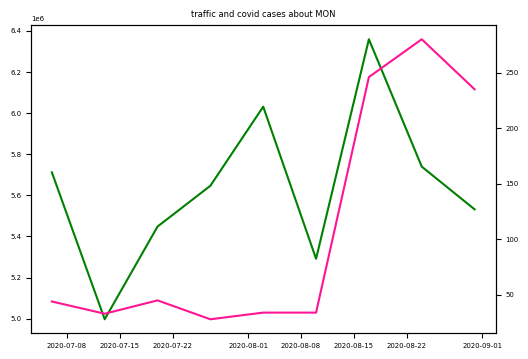

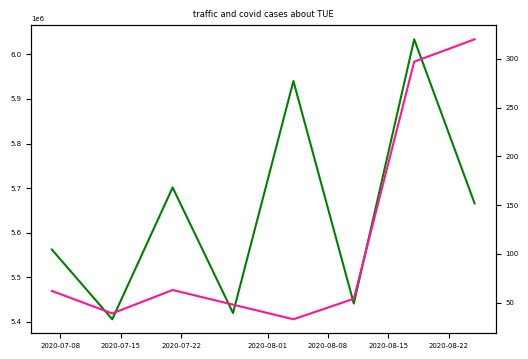

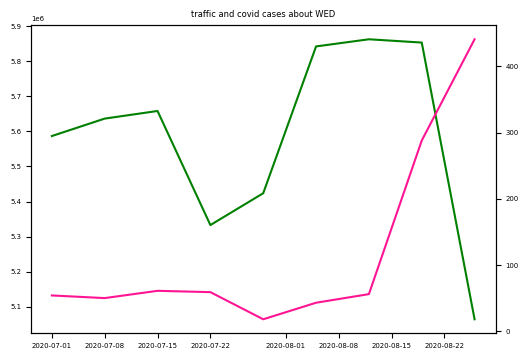

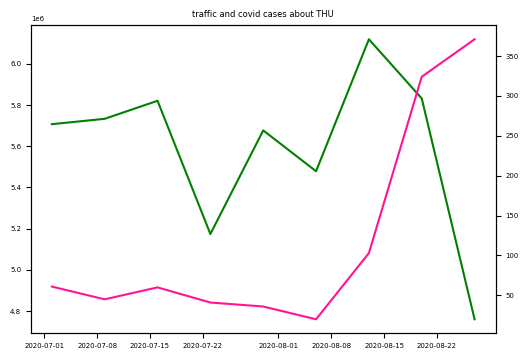

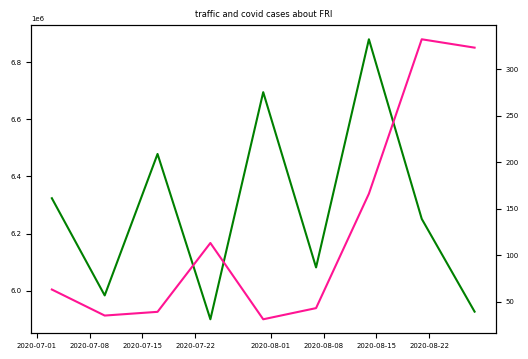

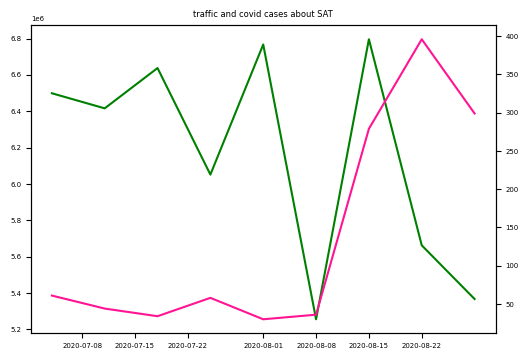

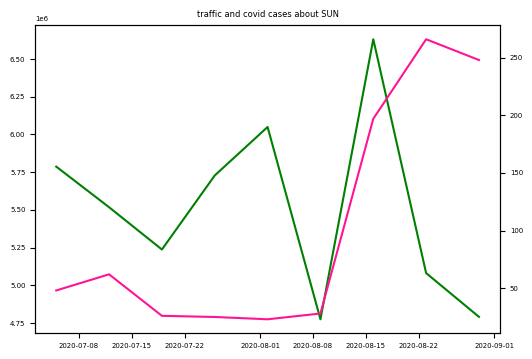

In [20]:
days=['MON','TUE','WED','THU','FRI','SAT','SUN']
for i in days:
    graphing('1종교통량',i)

Text(0.5, 1.0, 'traffic and covid cases about Weekdays')

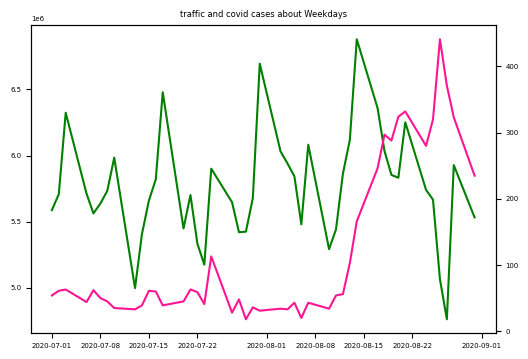

In [16]:
# 주중 코로나 확진자 수와 교통량 간의 관계
graph=data_mart_total[((data_mart_total.day_of_week=='MON')|(data_mart_total.day_of_week=='TUE')|(data_mart_total.day_of_week=='WED')|(data_mart_total.day_of_week=='THU')|(data_mart_total.day_of_week=='FRI'))&((data_mart_total.year==2020)&((data_mart_total.month==7)|(data_mart_total.month==8)))]
plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 5
fig, ax1 = plt.subplots()
ax1.plot(graph['date'], graph['1종교통량'], color='green')
ax2 = ax1.twinx()
ax2.plot(graph['date'], graph['daily_decideCnt'], color='deeppink')
plt.title('traffic and covid cases about Weekdays')

Text(0.5, 1.0, 'traffic and covid cases about Weekends')

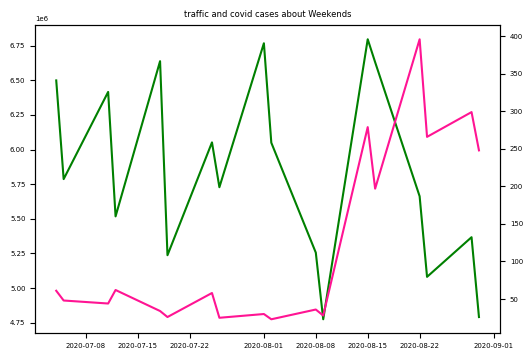

In [21]:
# 주말 코로나 확진자와 교통량 관계
graph=data_mart_total[((data_mart_total.day_of_week=='SAT')|(data_mart_total.day_of_week=='SUN'))&((data_mart_total.year==2020)&((data_mart_total.month==7)|(data_mart_total.month==8)))]
plt.style.use('default')
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['font.size'] = 5
fig, ax1 = plt.subplots()
ax1.plot(graph['date'], graph['1종교통량'], color='green')
ax2 = ax1.twinx()
ax2.plot(graph['date'], graph['daily_decideCnt'], color='deeppink')
plt.title('traffic and covid cases about Weekends')